In [2]:
import pandas as pd
import networkx as nx
# import itertools
# import spacy
# import matplotlib.pyplot as plt
import numpy as np

In [3]:
## check soda user 
raw_df = pd.read_csv('/Users/zhangyumeng/Desktop/2022Spring/DS_for_Network/Final Project/soda_fans_514.csv')
user_first_df = pd.read_csv('/Users/zhangyumeng/Desktop/2022Spring/DS_for_Network/Final Project/user_first_review.csv')[['user_id','year']].rename(columns={'year':'first_post_year'})


In [232]:
friends2009_csv = pd.read_csv('/Users/zhangyumeng/Desktop/2022Spring/DS_for_Network/Final Project/2009_friend_count.csv')
friends2010_csv = pd.read_csv('/Users/zhangyumeng/Desktop/2022Spring/DS_for_Network/Final Project/riend_count_2010.csv')[['user_id','friend_count']]

In [241]:
friends_csv = pd.concat([friends2009_csv,friends2010_csv]).drop_duplicates().rename(columns={'user_id':'node'})

In [205]:
len(friends_csv['user_id'].unique())

47550

In [134]:
friends_list = friends_csv['user_id'].unique()

In [3]:
nx.__version__

'2.3'

In [8]:
plot_df = raw_df.merge(user_first_df, on = ['user_id'])
plot_df = plot_df.loc[plot_df['friends'] != 'None']
plot_df = plot_df[['review_id','user_id','friends','year','first_post_year','text']]

In [9]:
plot_df.groupby(by='user_id',as_index=0)['review_id'].count()

,user_id,review_id
0,---2PmXbF47D870stH1jqA,3
1,--56mD0sm1eOogphi2FFLw,1
2,--7RsF352JpCHqaUt4NN4Q,1
3,--CiqXBj69Uu4YN1WTQ82Q,1
4,--FQ61qe5wDSc6lDENlrUQ,1
...,...,...
91625,zzdsnjlRXEu120ZRTLAwPA,1
91626,zzgMuJgxmToqcJ5iu1TngQ,1
91627,zzi3f5WvWbJoljorfG5F1w,1
91628,zziJLt25YU6dp01sewR-IQ,3


In [171]:
plot_df.groupby(by=['first_post_year'],as_index=0)['user_id'].nunique()

,first_post_year,user_id
0,2008,1290
1,2009,2013
2,2010,3517
3,2011,5068
4,2012,5352
5,2013,6311
6,2014,8359
7,2015,9824
8,2016,9776
9,2017,9945


In [10]:
year_list = [i for i in range(2008,2022)]
year_list

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [116]:
user_dic[2009]

array(['e7V5B3xq3rRNxmABwFKqVw', 'LkXNQQaIc5yrKu9Ap87RrA',
       '6R1EcQvREY_Qs6Vf2dy5sg', ..., 'iK13KH0YnJaMke0jns4DzQ',
       'Qsx0KGwtJGnlZfUV_VokcA', 'pR16xbRTNKAa4IDBM8NjDw'], dtype=object)

In [11]:
user_dic = {}
for year in year_list:
  user_dic[year] = plot_df[plot_df['first_post_year']==year]['user_id'].unique()

#### check friends_num quantile

In [12]:
plot_check = plot_df.copy()
plot_check['friends'] = [i.split(', ') for i in plot_check['friends']]
plot_check['friends_num'] = [len(i) for i in plot_check['friends']]

In [185]:
plot_check['friends_num'].quantile(0.7)

178.0

#### Check number of unique friends

In [201]:
# plot_df_v2 = plot_df[plot_df['friends_num']<=178]
tot_list = df2009['friends'].to_list()
unique_list = []
for lissy in tot_list:
    unique_list.extend(lissy)
cleaned_list = {i for i in unique_list}
len(cleaned_list)

200695

In [202]:
cleaned_list = list(cleaned_list)

In [204]:
counter = 0
for i in cleaned_list:
    if i in user_dic[2010]:
        counter += 1

In [205]:
counter

1446

In [254]:
df2010 = creat_network_df(2010,plot_df)
tot_list = df2010['friends'].to_list()
unique_list = []
for lissy in tot_list:
    unique_list.extend(lissy)
cleaned_list = {i for i in unique_list}
cleaned_list = list(cleaned_list)

/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/2150250981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_df['friends'] =  [i.split(', ') for i in network_df['friends']]


In [255]:
counter = 0
for i in cleaned_list:
    if i in user_dic[2011]:
        counter += 1

In [256]:
counter

2368

### Build Network

In [538]:
#create yearly dataframe for building network
def creat_network_df(year,df):
    network_df = df[df['first_post_year']==year]
    network_df['friends'] =  [i.split(', ') for i in network_df['friends']]
    return network_df

# Build up network
def build_net(graph,net_df,drinker_list,year):
    if year == 2009:
        g = nx.Graph()
    else:
        g = graph        
    net_df = net_df.reset_index()
    for index,row in net_df.iterrows():
        user = row['user_id']
        if user not in g.nodes():
            g.add_node(user)
            g.nodes[user]['drinker'] = 1
        for friend in row['friends']:
            # if friend in friends_list:
            if (friend not in g.nodes()):                
                # tot_friends_num = int(friends_csv[friends_csv['user_id']==friend]['friend_count'][0])
                # print(tot_friends_num)
                g.add_node(friend)
                # g.nodes[friend]['tot_friends_num'] = tot_friends_num
            g.add_edge(friend,user)

            if friend in drinker_list:
                g.nodes[friend]['drinker'] = 1
            else:
                g.nodes[friend]['drinker'] = 0 
    return g

def update_drinker_friends(g,drinker_list):
    for node in g.nodes():
        if g.nodes[node]['drinker'] == 0:
            counter = 0
            for neighbour in g.neighbors(node):
                if neighbour in drinker_list:
                    counter += 1   
            g.nodes[node]['drinker_friends_num'] = counter
            # g.nodes[node]['drinker_friends_propotion'] = counter/g.nodes[node]['tot_friends_num']
    return g

In [ ]:
clustering_coeffient (how many drinker friends are_ riends hemself)

In [209]:
def update_net(g,next_year_list,year):
    counter = 0
    node_list = []
    for node in g.nodes():
        if node in next_year_list:
            if g.nodes[node]['drinker'] == 0:
                g.nodes[node]['affected'] = 'affected'+str(year)
                g.nodes[node]['drinker'] = 1
                node_list.append((node,g.nodes[node]['drinker_friends_num']))
                counter += 1
    print('There are ',counter,' people in total that been affected in ',year)
    return g,node_list            

In [431]:
tmp_2009 = first_try_graph = build_net(nx.Graph(),df2009,user_dic[2009],2009)
tmp_2009_1 = update_drinker_friends(tmp_2009,user_dic[2009])
tmp_2009_2,affected_people_2010 = update_net(tmp_2009_1,user_dic[2010],2010)

There are  1446  people in total that been affected in  2010


In [270]:
tmp_2010 = first_try_graph = build_net(nx.Graph(),df2010,user_dic[2010],2010)
tmp_2010_1 = update_drinker_friends(tmp_2010,user_dic[2010])
tmp_2010_2,affected_people_2011 = update_net(tmp_2010_1,user_dic[2011],2011)

There are  2368  people in total that been affected in  2011


In [271]:
affected_people_2011

[('ZbOK_2m4kifew3lzTep1yQ', 23),
 ('F5k8L6AjFz7BXntRwSjp5Q', 4),
 ('i3wh50DO_wChXvVrOsfRrw', 5),
 ('cogPv5baWhsR-_Dcw3-Taw', 20),
 ('-FLoZbiOcx2PyubOV94phQ', 10),
 ('hoRqFeBDKZkRTfGZlQA2jg', 3),
 ('eZZUxt0aNMTg0di_hLBzbA', 14),
 ('tdfqcb5OzVJ2hHnsYarnyQ', 17),
 ('CQUDh80m48xnzUkx-X5NAw', 43),
 ('rpUOaLv_7QkDeFQSZMZhOg', 25),
 ('DAeC-Y66n-jNMJJw4oAfNQ', 60),
 ('L7oWPLGG61B75kvJjl-uVQ', 10),
 ('waY4AzngWdZ9JqYBrUUmew', 23),
 ('HFECrzYDpgbS5EmTBtj2zQ', 78),
 ('XBNtqhc72X57VK8GLNbsGg', 3),
 ('XFuIJoqujF2M2gdFAf8aPQ', 5),
 ('x52p89JRZtOqlf2VCvrmBw', 9),
 ('Ll5l4WTKPH7zWQWA68Rhdw', 20),
 ('H8evlZitNdbCar4jqG_lZw', 19),
 ('sgtV2_36FV0otK0pjHIHNg', 20),
 ('tZ9x2DIDfgUeP92CDRpv5A', 4),
 ('bCgB0aN-4vJWI4yVtVjlHA', 14),
 ('2mehWDiaP-8CcZRtLGlYIA', 21),
 ('-jtgElkxZn4Nr6J_p67o_Q', 7),
 ('dhMSQzqMigb5sx-Z-CPJNQ', 66),
 ('6aX5_fuL6p2P4sMyb8MyJw', 11),
 ('qWYEuBZP7av55tewg3PXKg', 61),
 ('LBV8oWri3DhnlzY7fFqUFA', 5),
 ('HTXhg8KC9bLyMTH4mTOm7w', 1),
 ('jrLCaGDNHLwQVNCv-blHkQ', 3),
 ('vDACtEdgJP3mS-U0_N

In [536]:
year_list_try = [2009,2010,2011]

In [539]:
iterator = 0
graph_update_lissy = []
graph_save_lissy = []
for year in year_list_try:
    affected_people_dic = {}
    if iterator == 0:
        graph = None
    else:
        graph = graph_update_lissy[iterator-1]
    
    year_df = creat_network_df(year,plot_df)
    # df_try = year_df.head()
    init_graph = build_net(graph,year_df,user_dic[year],year)
    graph_1 = update_drinker_friends(init_graph,user_dic[year])
    graph_2,node_list = update_net(graph_1,user_dic[year+1],year+1)
    graph_2_final = graph_2.copy()
    
    affected_people_dic[year] = affected_people
    
    graph_update_lissy.append(graph_2)
    graph_save_lissy.append(graph_2_final)
    
    iterator += 1

/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/2150250981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_df['friends'] =  [i.split(', ') for i in network_df['friends']]


There are  1446  people in total that been affected in  2010


/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/2150250981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_df['friends'] =  [i.split(', ') for i in network_df['friends']]


There are  2659  people in total that been affected in  2011


/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/2150250981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_df['friends'] =  [i.split(', ') for i in network_df['friends']]


There are  2761  people in total that been affected in  2012


In [540]:
len(graph_update_lissy)

3

In [104]:
graph_update_lissy[0] == graph_update_lissy[1]

True

#### Check Graph by plot_df

In [253]:
list_2010 =  [i[0] for i in affected_people_dic[2010]]

In [266]:
r = 0
differ_list = []
consis_list = []
for i in list_2010:
    if i in user_dic[2011]:
        r+=1
        consis_list.append(i)
    else:
        differ_list.append(i) 
differ_list

[]

In [267]:
len(differ_list)

0

In [268]:
len(consis_list)

2659

#### Turn Graph to DataFrame

In [469]:
graph_all = graph_update_lissy[1]
graph_2009 = tmp_2009_2
graph_2010 = tmp_2010_2

In [461]:
def convert_graph_to_df(G):
    dic = []
    # index=0
    for node in G:
        node_dic = {}
        # node_dic['index'] = index
        node_dic['node']=node
        drinker = G.nodes[node]['drinker']
        try:
            drinker_friends = G.nodes[node]['drinker_friends_num']
        except:
            drinker_friends = "I'm drinker"
        node_dic['drinker']= drinker
        node_dic['drinker_friends_num'] = drinker_friends
        try:
            node_dic['affected'] = G.nodes[node]['affected']
        except:
            node_dic['affected'] = 'not_affected'  
        # index+=1
        dic.append(node_dic)
        
    l = []
    for dct in dic:
        l.append(pd.DataFrame.from_dict(dct,orient='index').T) 
    df = pd.concat(l)
    return df

In [466]:
df_2009_new = convert_graph_to_df(graph_2009)

In [470]:
df_2010_new = convert_graph_to_df(graph_2010)

In [782]:
df_2009_new

,node,drinker,drinker_friends_num,affected
0,e7V5B3xq3rRNxmABwFKqVw,1,I'm drinker,not_affected
0,wfvG4FemqvY0eC069zOpjw,0,2,not_affected
0,uqTVZBYO1m6QlyET5oHyhg,0,2,not_affected
0,WxLPxKilyWVuOcR2wrZgSA,0,1,not_affected
0,AKasXZ1lCqVwho86zfIwAg,0,1,not_affected
...,...,...,...,...
0,1MvMOs0jvK8hCBpAkttAFA,0,1,not_affected
0,CADhesj7J_-U9PKVpPGq4g,0,1,not_affected
0,pybOo3WqQ9T56jHAsfSyXg,0,1,not_affected
0,28K7Yw2p5i-I5CQDYDrtBQ,0,1,not_affected


In [243]:
friends_csv

,node,friend_count
0,FoRLXO2eJZkzrxBS_nhrHQ,7
1,frYYWyY1sO_Jj7gOLQF9dA,76
2,4R0Ay9r-l55-fVMGC052ng,9
3,zkbZ7j7oKqt9K3276Rc1kw,355
4,-AEbxWDSB8MnvOv7EwbinQ,248
...,...,...
78144,g-UG7RrxdJ31-JG0Z4J7gg,48
78145,Ke6m2uYNZEbw44402o2CHA,76
78147,kn2rpSCLPE0lp4pkZsiU3w,71
78148,hSikfrWM3hrwreN1yeusSg,141


In [306]:
df_09_10_merge = df_09_10.merge(friends_csv,how='inner',on='node')
df_09_10_merge['friend_count'] = df_09_10_merge['friend_count'].astype(int)

In [472]:
df_2009_merge = df_2009_new.merge(friends_csv,how='inner',on='node')
df_2010_merge = df_2010_new.merge(friends_csv,how='inner',on='node')

df_2010_result = df_2010_merge[df_2010_merge['affected']=='affected2011']
df_2010_result['drinker_friends_num'] = df_2010_result['drinker_friends_num'].astype(int)
df_2010_result['friend_count'] = df_2010_result['friend_count'].astype(int)
df_2010_result['Pi'] = df_2010_result['drinker_friends_num']/df_2010_result['friend_count']
df_2010_result['Pi_round2'] = df_2010_result['Pi'].round(2)*100
df_2010_result['Pi_round3'] = df_2010_result['Pi'].round(3)*100

df_2009_result = df_2009_merge[df_2009_merge['affected']=='affected2010']
df_2009_result['drinker_friends_num'] = df_2009_result['drinker_friends_num'].astype(int)
df_2009_result['friend_count'] = df_2009_result['friend_count'].astype(int)
df_2009_result['Pi'] = df_2009['drinker_friends_num']/df_2009['friend_count']
df_2009_result['Pi_round3'] = df_2009_result['Pi'].round(3)*100
df_2009_result['Pi_round2'] = df_2009_result['Pi'].round(2)*100

/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/3119389781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010_result['drinker_friends_num'] = df_2010_result['drinker_friends_num'].astype(int)
/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/3119389781.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010_result['friend_count'] = df_2010_result['friend_count'].astype(int)
/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/3119389781.py:7: SettingWith

In [798]:
non_drinker_2009 = df_2009_merge[(df_2009_merge['drinker_friends_num']!="I'm drinker")&(df_2009_merge['affected']=='not_affected')]
non_drinker_2010 = df_2010_merge[(df_2010_merge['drinker_friends_num']!="I'm drinker")&(df_2010_merge['affected']=='not_affected')]

non_drinker_2009['drinker_friends_num'] = non_drinker_2009['drinker_friends_num'].astype(int)
non_drinker_2009['Pi'] = non_drinker_2009['drinker_friends_num']/non_ori_drinker['friend_count']
non_drinker_2009['Pi_round2'] = non_drinker_2009['Pi'].round(2)*100
non_drinker_2009['Pi_round3'] = non_drinker_2009['Pi'].round(3)*100

non_drinker_2010['drinker_friends_num'] = non_drinker_2010['drinker_friends_num'].astype(int)
non_drinker_2010['Pi'] = non_drinker_2010['drinker_friends_num']/non_ori_drinker['friend_count']
non_drinker_2010['Pi_round2'] = non_drinker_2010['Pi'].round(2)*100
non_drinker_2010['Pi_round3'] = non_drinker_2010['Pi'].round(3)*100

non_drinker_2009_propo = non_drinker_2009.groupby(by='Pi_round2',as_index=0)['node'].count().rename(columns={'node':'tot_node'})
non_drinker_2010_propo = non_drinker_2010.groupby(by='Pi_round2',as_index=0)['node'].count().rename(columns={'node':'tot_node'})

/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/3695283602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_drinker_2009['drinker_friends_num'] = non_drinker_2009['drinker_friends_num'].astype(int)
/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/3695283602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_drinker_2009['Pi'] = non_drinker_2009['drinker_friends_num']/non_ori_drinker['friend_count']
/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/369

In [799]:
clustering_coef_lissy_2009 = []
for node in df_2009['node'].unique():
    clustering_coef_lissy_2009.append(nx.clustering(graph_update_lissy[-1],node))
    
clustering_coef_lissy_2010 = []
for node in df_2010['node'].unique():
    clustering_coef_lissy_2010.append(nx.clustering(graph_update_lissy[-1],node))
    
df_2009_result['clustering_coef'] = clustering_coef_lissy_2009
df_2009_result['clustering_coef'] = df_2009_result['clustering_coef'].round(3)/10
# df_2010_result['clustering_coef'] = clustering_coef_lissy_2010
# df_2010_result['clustering_coef'] = df_2010_result['clustering_coef'].round(3)/20

/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/3409425374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009_result['clustering_coef'] = clustering_coef_lissy_2009
/var/folders/1y/nmwtj9113xnbklj5fpqwd8lm0000gn/T/ipykernel_7662/3409425374.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009_result['clustering_coef'] = df_2009_result['clustering_coef'].round(3)/10


In [913]:
df_2009_result[df_2009_result['Pi']<=0.15]

,node,drinker,drinker_friends_num,affected,friend_count,Pi,Pi_round3,Pi_round2,clustering_coef
6,RlXfOTtpgTfcisRmukrGbw,1,9,affected2010,998,0.009018,0.9,1.0,0.0007
25,LhnoqfSZobV3bch7of-Kaw,1,3,affected2010,655,0.004580,0.5,0.0,0.0006
54,mvK1pv-x0Z5rP4Hz9cWBWw,1,29,affected2010,5902,0.004914,0.5,0.0,0.0002
69,PJwyYfwsI0CJto1eYxuKtA,1,16,affected2010,2077,0.007703,0.8,1.0,0.0005
75,H183Fg4ku9mIQsmAa0fsOQ,1,5,affected2010,316,0.015823,1.6,2.0,0.0016
...,...,...,...,...,...,...,...,...,...
47420,IQ472MMYH8-eap6Jpi1pzg,1,1,affected2010,12,0.083333,8.3,8.0,0.0030
47435,QhdIzKJois7XDHj7huFjQw,1,1,affected2010,24,0.041667,4.2,4.0,0.0011
47505,539TneaQp-AoSTblKwVLZg,1,1,affected2010,103,0.009709,1.0,1.0,0.0000
47590,x9rkVoNB92HR_bFOe6MFTQ,1,1,affected2010,212,0.004717,0.5,0.0,0.0001


In [914]:
1312/1446

0.9073305670816044

<AxesSubplot:xlabel='Pi_round2'>

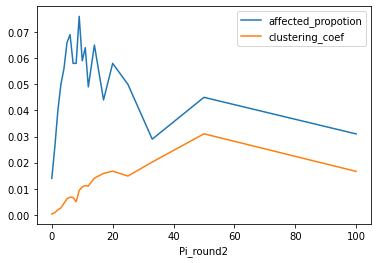

In [805]:
df_2009_propo = df_2009_result.groupby(by='Pi_round2',as_index=0).agg({'node':'count','clustering_coef':'mean','drinker_friends_num':'mean'})
# df_2010_propo = df_2010_result.groupby(by='Pi_round2',as_index=0).agg({'node':'count','clustering_coef':'mean','drinker_friends_num':'mean'})

Pi_2009 = df_2009_propo.merge(non_drinker_2009_propo,on='Pi_round2',how='left')
Pi_2009['affected_propotion'] = (Pi_2009['node']/Pi_2009['tot_node']).round(3)
Pi_2009 =  Pi_2009[(Pi_2009['tot_node'] > 200)]
Pi_2009.plot(x='Pi_round2',y=['affected_propotion','clustering_coef'])

<AxesSubplot:xlabel='Pi_round2'>

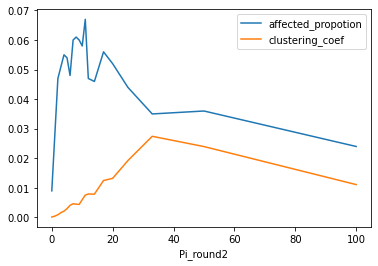

In [804]:
Pi_2010 = df_2010_propo.merge(non_drinker_2010_propo,on='Pi_round2',how='left')
Pi_2010['affected_propotion'] = (Pi_2010['node']/Pi_2010['tot_node']).round(3)
Pi_2010 =  Pi_2010[(Pi_2010['tot_node'] > 400)]
Pi_2010.plot(x='Pi_round2',y=['affected_propotion','clustering_coef'])

### Investigate super-reviews

In [440]:
def find_review_lower_than_Pi(df,threshold):
    df = df.reset_index()
    target = []
    for index,row in df.iterrows():
        if row['Pi_round3'] < threshold:
            target.append(row['node'])
    return target

def find_review_higher_than_Pi(df,threshold):
    df = df.reset_index()
    target = []
    for index,row in df.iterrows():
        if row['Pi_round3'] > threshold:
            target.append(row['node'])
    return target

In [808]:
not_affected = df_2009_new[(df_2009_new['affected']=='not_affected')&(df_2009_new['drinker_friends_num']!="I'm drinker")]
not_affected = not_affected.merge(friends_csv,how='inner',on='node')
not_affected['drinker_friends_num'] = not_affected['drinker_friends_num'].astype(int)
not_affected['Pi'] = not_affected['drinker_friends_num']/not_affected['friend_count']
not_affected['Pi_round2'] = not_affected['Pi'].round(2)*100
not_affected['Pi_round3'] = not_affected['Pi'].round(3)*100

In [825]:
not_affected[(not_affected['Pi']>0.2)&(not_affected['drinker_friends_num']>3)]

,node,drinker,drinker_friends_num,affected,friend_count,Pi,Pi_round2,Pi_round3
268,j2OqyCv3-3hvJteY87eD3g,0,4,not_affected,19,0.210526,21.0,21.1
919,uiEuAm2EwRAFEoG79Bphjg,0,8,not_affected,22,0.363636,36.0,36.4
1685,GsxGzgtRt1aYi2GYNEPmAg,0,5,not_affected,9,0.555556,56.0,55.6
1736,6WTtnegZdbbrSdp_7lsk9g,0,4,not_affected,19,0.210526,21.0,21.1
1834,2AGG5NBzU0sByMQK_NZWQg,0,10,not_affected,41,0.243902,24.0,24.4
1848,GaacaTNh_rOgJO3zbfqPkw,0,14,not_affected,62,0.225806,23.0,22.6
4172,aBPkfaRMCuX4e5v1jomr1Q,0,6,not_affected,23,0.260870,26.0,26.1
6490,f7HS6pb6oP9olbxt2VCOww,0,4,not_affected,16,0.250000,25.0,25.0
7875,9piMEmpL9nfG8OBA31Ihlw,0,4,not_affected,15,0.266667,27.0,26.7
7891,rrJWg9JmqjNT5YT8t5Yn0w,0,4,not_affected,19,0.210526,21.0,21.1


In [814]:
node_list1 = not_affected[(not_affected['Pi']>0.2)&(not_affected['drinker_friends_num']>3)]['node'].unique()

In [826]:
node_list2 = df_2009_result[(df_2009_result['Pi']<0.01)&(df_2009_result['drinker_friends_num']>=5)]['node'].unique()

In [657]:
def find_drinker_friend(node_list,g):
    friend_list = []
    for node in node_list:
        for neighbour in g.neighbors(node):
            if g.nodes[neighbour]['drinker'] == 1:
                if neighbour not in friend_list:
                    friend_list.append(neighbour)
    return friend_list

In [776]:
tot_2009 = plot_df[(plot_df['first_post_year']==2009)&(plot_df['year']==2009)]

In [892]:
# little_drinker_friend = df_2009_result[(df_2009_result['Pi']<0.01)]['node'].unique()
super_propogator = find_drinker_friend(node_list2,graph_2009)
super_propogator_review = clean('text',tot_2009[tot_2009['user_id'].isin(super_propogator)])

In [904]:
tot_2009[tot_2009['user_id'].isin(super_propogator)].to_csv('group1.csv')
tot_2009[tot_2009['user_id'].isin(sloopy_user)].to_csv('group2.csv')

In [848]:
super_propogator_review

{0: ['ive',
  'found',
  'better',
  'top-quality',
  'ever',
  'dishes',
  'take',
  'filling',
  'tempeh',
  'ponzu',
  'amazed',
  'place',
  'golden',
  'lost',
  'tastier',
  'drink',
  'accompanying',
  'gourmet',
  'delicate',
  'bourbon',
  'chocolate',
  'keep',
  'edamame',
  'us',
  'ice',
  'every',
  'easily',
  'succulent',
  'tapas',
  'cheesecake',
  'portobella',
  'get',
  'beet',
  'quality',
  'carpaccio',
  '79',
  'world-class',
  'upstairs',
  'would-be',
  'butter',
  'restaurant',
  'side',
  'tasty',
  'millennium',
  'mash',
  'level',
  'pacific',
  'best',
  'tender',
  'penny',
  'top',
  'puree',
  'food',
  'dessert',
  'make',
  'presented',
  'like',
  'fancy',
  'candle',
  'beats',
  'otherwise',
  'lover',
  'tofu',
  'hip',
  'cream',
  'service',
  'artfully',
  'prices',
  'high',
  'lower',
  'date',
  'peanut',
  'horizons',
  'everything',
  'competitors',
  'bbq',
  'thinking',
  'vegan',
  'sure',
  'prepared',
  'worth',
  'five-star',
  'l

In [702]:
infected_people_2010 = plot_df[(plot_df['first_post_year']==2010)]['user_id'].unique()
drinker_2009 = tot_2009[['user_id','friends']].drop_duplicates()
drinker_2009['friends'] = [i.split(', ') for i in drinker_2009['friends']]
drinker_2009['infect_num'] = [len([j for j in i if j in infected_people_2010]) for i in drinker_2009['friends']]

In [891]:
sloopy_user = find_drinker_friend(node_list1,graph_2009)
sloopy_user_review = clean('text',tot_2009[tot_2009['user_id'].isin(sloopy_user)])

In [ ]:
counter = 0
for i in sloopy_user:
    if i in super_propogator:
        counter+=1

In [ ]:
counter

31

#### Create corpus and vector representation of Reviews with Gensim

In [893]:
def clean(colunm,df):
    lissy = df[colunm].unique()
    dic = {}
    for i in range(len(lissy)):
        dic[i] = lissy[i]
    
    cleaned_dic = {}
    for k,v in dic.items():
        cleaned_content = v.split('_')
        # cleaned_content = normalize(v,lowercase=True,remove_stopwords=True)
        cleaned_dic[k] = cleaned_content
    return cleaned_dic

In [905]:
from collections import defaultdict
from gensim import corpora
from gensim import models
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import gensim

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

#### Run LDA Topic Modeling on Soda Corpus

In [890]:
def find_topics(review):
    dictionary = corpora.Dictionary(review.values())
    corpus = [dictionary.doc2bow(text) for text in review.values()] # convert corpus to BoW format
    lda = LdaMulticore(corpus, num_topics=20, id2word=dictionary, workers=3)
    corpus_topic = lda[corpus]
    return lda,corpus,dictionary

/Users/zhangyumeng/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/zhangyumeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/zhangyumeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. D

In [896]:
alch_csv = pd.read_csv('alcohol_review.csv')

In [898]:
alch_csv

(608574, 10)

In [899]:
alch_review = clean('text',alch_csv[:10000])

In [906]:
lda3,corpus3,dictionary3 = find_topics(alch_review)
print(lda2.print_topics()[0])

(0, '0.005*"chocolate" + 0.004*"got" + 0.004*"went" + 0.003*"good" + 0.003*"place" + 0.003*"im" + 0.003*"back" + 0.003*"like" + 0.003*"get" + 0.003*"go"')


In [894]:
lda1,corpus1,dictionary1 = find_topics(super_propogator_review)
print(lda1.print_topics()[0])

(0, '0.007*"good" + 0.006*"chocolate" + 0.006*"place" + 0.005*"like" + 0.004*"food" + 0.004*"one" + 0.004*"get" + 0.004*"go" + 0.004*"would" + 0.003*"dont"')


In [895]:
lda2,corpus2,dictionary2 = find_topics(sloopy_user_review)
print(lda2.print_topics()[0])

(0, '0.005*"chocolate" + 0.004*"got" + 0.004*"went" + 0.003*"good" + 0.003*"place" + 0.003*"im" + 0.003*"back" + 0.003*"like" + 0.003*"get" + 0.003*"go"')


In [871]:
threshold = 20
counter = 0
for topics in lda1.print_topics():
    counter+=1
    if counter <= threshold:
        print(counter,': ',topics)

1 :  (0, '0.006*"chocolate" + 0.004*"good" + 0.004*"like" + 0.004*"food" + 0.004*"one" + 0.003*"place" + 0.003*"everything" + 0.003*"would" + 0.003*"little" + 0.002*"cheese"')
2 :  (1, '0.005*"chocolate" + 0.005*"good" + 0.004*"like" + 0.003*"get" + 0.003*"place" + 0.003*"best" + 0.003*"food" + 0.003*"love" + 0.003*"little" + 0.003*"one"')
3 :  (2, '0.007*"chocolate" + 0.004*"good" + 0.004*"well" + 0.004*"delicious" + 0.003*"place" + 0.003*"food" + 0.003*"would" + 0.003*"like" + 0.003*"back" + 0.003*"even"')
4 :  (3, '0.005*"one" + 0.004*"chocolate" + 0.004*"good" + 0.004*"also" + 0.004*"really" + 0.004*"dont" + 0.003*"place" + 0.003*"ive" + 0.003*"like" + 0.003*"time"')
5 :  (4, '0.005*"good" + 0.004*"chocolate" + 0.004*"place" + 0.003*"one" + 0.003*"get" + 0.003*"back" + 0.003*"ordered" + 0.003*"really" + 0.003*"time" + 0.003*"well"')
6 :  (5, '0.005*"chocolate" + 0.004*"one" + 0.003*"place" + 0.003*"food" + 0.003*"good" + 0.003*"would" + 0.003*"like" + 0.003*"little" + 0.003*"even" 

In [861]:
threshold = 30
counter = 0
for topics in lda1.print_topics():
    counter+=1
    if counter <= threshold:
        print(counter,': ',topics)

1 :  (0, '0.004*"nice" + 0.003*";" + 0.003*"crinkle" + 0.002*"tried" + 0.002*"chicken" + 0.002*"loved" + 0.002*"fried" + 0.002*"meal" + 0.002*"offer" + 0.002*"back"')
2 :  (1, '0.003*";" + 0.003*"crinkle" + 0.002*"nice" + 0.002*"flavor" + 0.002*"meal" + 0.002*"restaurant:" + 0.002*"fried" + 0.002*"see" + 0.002*"ingredients" + 0.002*"tell"')
3 :  (2, '0.005*"nice" + 0.005*"meal" + 0.004*"chicken" + 0.004*"crinkle" + 0.003*"flavor" + 0.003*"fried" + 0.003*"ingredients" + 0.003*";" + 0.002*"patrol" + 0.002*"loved"')
4 :  (3, '0.003*"nice" + 0.002*"crinkle" + 0.002*"patrol" + 0.002*"flavor" + 0.002*"back" + 0.002*"fried" + 0.002*"heavy" + 0.002*"meal" + 0.002*"critical" + 0.002*"music"')
5 :  (4, '0.004*"nice" + 0.003*"flavor" + 0.003*"crinkle" + 0.002*"fried" + 0.002*";" + 0.002*"meal" + 0.002*"tried" + 0.002*"back" + 0.002*"ingredients" + 0.002*"pudding"')
6 :  (5, '0.003*"crinkle" + 0.003*"nice" + 0.002*"meal" + 0.002*";" + 0.002*"loved" + 0.002*"fried" + 0.002*"chicken" + 0.002*"spicy"

333       q5XXfTqsw29kpQWPKqybYA
2054      H8f2BQKbtGOlbwQoN1lh6g
4749      u0_nO0Mg1p3iDQxfP-faOg
5690      J1lHd4LbGWf6nSUoxlIXrQ
5738      yO4Fpy83DEkx7R5q3TKFIA
                   ...          
217290    4LatzQlK7O_qAjarmcfN3Q
217448    Oto7YQXZWAqNnGnGTEV6GQ
217622    -cHwlCxRUfl5aaLZThwNoA
217834    Xi6RNxRDIdpgQh1gcw9Gmg
219024    JOLcA1palangTWuF6uWz7g
Name: review_id, Length: 716, dtype: object